<AxesSubplot:>

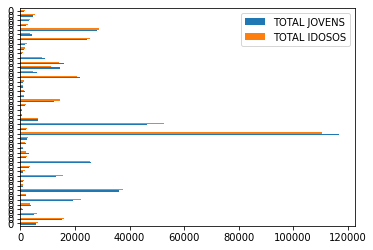

In [44]:
# 4.5
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvPerfilEleitorado2020 = './dados/perfil_eleitorado_2020.csv'

dataPerfilEleitorado2020 = pd.read_csv(csvPerfilEleitorado2020, sep= ';', encoding='ISO-8859-1')

def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

query = createQuery(abrangencia)

dfPerfilEleitorado2020 = pd.DataFrame(data = dataPerfilEleitorado2020.query(query), columns=['CD_MUNICIPIO', 'DS_FAIXA_ETARIA', 'QT_ELEITORES_PERFIL'])
dfm = pd.DataFrame(columns=["REGIÃO", "MUNICÍPIO", "TOTAL JOVENS", "TOTAL IDOSOS"])
listResults = []


for abr_code in abrangencia:
        filtroCidade = dfPerfilEleitorado2020.query('CD_MUNICIPIO == ' + str(abr_code["codigo"]))
        filtroEleitoresTotal = filtroCidade['QT_ELEITORES_PERFIL'].sum()
        filtroEleitoresFaixaEtaria = filtroCidade.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
        
        faixa18 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('18 anos')]).values
        faixa19 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('19 anos')]).values
        faixa20 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('20 anos')]).values
        faixa21 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('21 a 24 anos')]).values
        faixa25a29 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('25 a 29 anos')]).values
        
        faixa60 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('60 a 64 anos')]).values
        faixa65 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('65 a 69 anos')]).values
        faixa70 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('70 a 74 anos')]).values
        faixa75 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('75 a 79 anos')]).values
        faixa80 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('80 a 84 anos')]).values
        faixa85 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('85 a 89 anos')]).values
        faixa90 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('90 a 94 anos')]).values
        faixa95 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('95 a 99 anos')]).values
        faixa100 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('100 anos ou mais')]).values
        
        if len(faixa18) == 0: faixa18 = [0]
        if len(faixa19) == 0: faixa19 = [0]
        if len(faixa20) == 0: faixa20 = [0]
        if len(faixa21) == 0: faixa21 = [0]
        if len(faixa25a29) == 0: faixa25a29 = [0]    
        if len(faixa60) == 0: faixa60 = [0]
        if len(faixa65) == 0: faixa65 = [0]
        if len(faixa70) == 0: faixa70 = [0]
        if len(faixa75) == 0: faixa75 = [0]
        if len(faixa80) == 0: faixa80 = [0]
        if len(faixa85) == 0: faixa85 = [0]
        if len(faixa90) == 0: faixa90 = [0]
        if len(faixa95) == 0: faixa95 = [0]
        if len(faixa100) == 0: faixa100 = [0]
        
        faixa18 = faixa18[0]
        faixa19 = faixa19[0]
        faixa20 = faixa20[0]
        faixa21 = faixa21[0]
        faixa25a29 = faixa25a29[0]
        faixa60 = faixa60[0]
        faixa65 = faixa65[0]
        faixa70 = faixa70[0]
        faixa75 = faixa75[0]
        faixa80 = faixa80[0]
        faixa85 = faixa85[0]
        faixa90 = faixa90[0]
        faixa95 = faixa95[0]
        faixa100 = faixa100[0]
        
        total_jovens = faixa18 + faixa19 + faixa20 + faixa21 + faixa25a29
        total_idosos = faixa60 + faixa65 + faixa70 + faixa75 + faixa80 + faixa85 + faixa90 + faixa95 + faixa100
        
        dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "TOTAL JOVENS":[total_jovens], "TOTAL IDOSOS":[total_idosos]})
        listResults.append(dft)

dfm = pd.concat(listResults)
dfm.plot(kind="barh")